## Data Science Project: Video Game Music

Se trata de un dataset extraído de Kaggle, sobre la música de diferentes videojuegos.

### Librerias que vamos a utilizar

In [110]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [45]:
music_data = pd.read_csv('music.csv')

music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


### Pruebas al Dataset para concer su composición

In [ ]:
df.shape 

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
#Muestra un array de dos dimensiones con los valores x columna de cada fila

df.values

### Separar el Dataset en dos 

##### Como no tenemos información del tipo de música que escuchan las personas de 21 años, le vamos a pedir al modelo que haga una predicción para poder determinarlo

In [54]:
X = music_data.drop(columns = ['genre'] )

In [ ]:
y = music_data[ 'genre' ] 

y

### Algoritmo: Decision Tree

In [111]:
model = DecisionTreeClassifier()

#Con este modelo vamos a poder hacer la predicción

model.fit(X.values, y.values)

#Para visualizar el arbol
#Crea un archivo nuevo

tree.export_graphviz(model, out_file= 'music-recommender.dot', 
                    feature_names=['age', 'gender'], 
                    class_names =sorted(y.unique()),
                    label = 'all', 
                    rounded = True,
                    filled = True)

#Este método toma un array de dos dimensiones

predictions = model.predict([ [21, 1] , [23, 0] ])

predictions

array(['HipHop', 'Dance'], dtype=object)

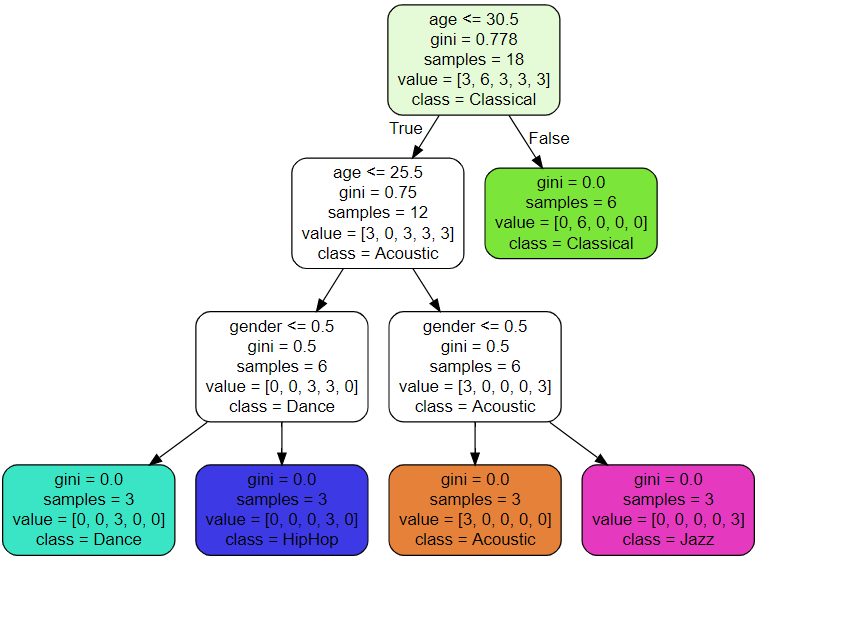

### Separar los modelos: uno para testear el otro para entrenar

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [109]:
model = DecisionTreeClassifier()

model.fit(X_train.values, y_train.values)

#Este método toma un array de dos dimensiones

predictions = model.predict(X_test)


#Y_test continene valores esperados
#Predictions contiene los valores reales

score = accuracy_score(y_test, predictions)

score

1.0